In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# загрузка датафреймов
events = pd.read_excel('hw_lesson04_events.xlsx')
purchases = pd.read_csv('hw_lesson04_purchases.csv')
purchases

,user_id,acq_channel,transactions
0,df0f3327-381,JetAds,37
1,df0f3327-381,SenseAds,36
2,241cb8694b53,GameAds,24
3,0c9453440c85,SenseAds,40
4,96-4377d99ca,BrainPlus,74
...,...,...,...
6884,9cd8aa06b00b,JetAds,54
6885,-f-dbaa-52f0,JetAds,42
6886,50d0c5-63801,BrainPlus,61
6887,109af6_d505-,BrainPlus,47


In [44]:
# редактирование данных
events['event_name'] = events['event_name'].replace('tuturial_started', 'tutorial_started')

Среднее для JetAds: 249.45
Среднее для GameAds: 253.96


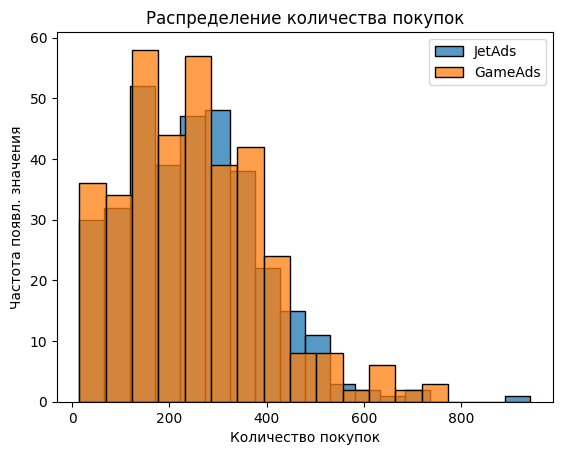

In [45]:
report = purchases.groupby('user_id').agg({'acq_channel': 'first', 'transactions': 'sum'})
report = report[report['acq_channel'].isin(['GameAds', 'JetAds'])]
for adn in report['acq_channel'].unique():
    current = report.query('acq_channel == @adn')['transactions']
    sns.histplot(current, label = adn)
    print('Среднее для {}: {:.2f}'.format(adn, current.mean()))
    plt.legend(), plt.title('Распределение количества покупок'), plt.xlabel('Количество покупок'), plt.ylabel('Частота появл. значения')

(Text(0.5, 0, 'Количество покупок'),
 Text(0, 0.5, 'Канал привлечения'),
 Text(0.5, 1.0, 'Сравнение распределений количества покупок в группах'))

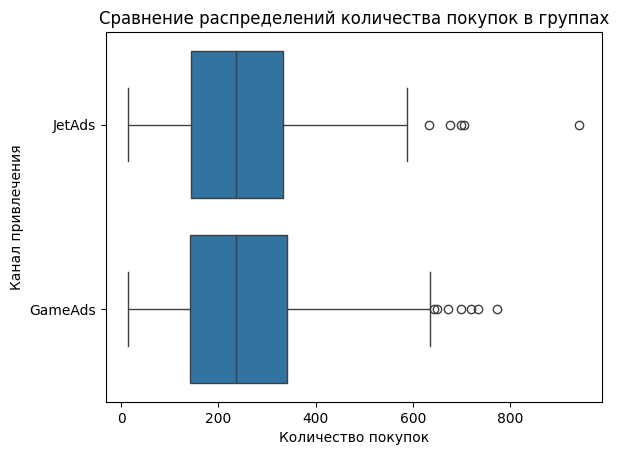

In [46]:
sns.boxplot(data = report, x = 'transactions', y = 'acq_channel')
plt.xlabel('Количество покупок'), plt.ylabel('Канал привлечения'), plt.title('Сравнение распределений количества покупок в группах')

По итогам получилось достаточно равное распределение. Правда стоит отметить, что у GameAds больше выбросов, но они менее значительно отклоняются.

In [47]:
report_ga = report.query('acq_channel == "GameAds"')['transactions']
report_ja = report.query('acq_channel == "JetAds"')['transactions']

alpha = 0.05

p_value = stats.ttest_ind(report_ga, report_ja, equal_var = False).pvalue
print('p-value: {:.5f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: средние в двух группах не равны.')
else:
    print('Не отвергаем нулевую гипотезу: средние в двух группах равны.')

p-value: 0.67494
Не отвергаем нулевую гипотезу: средние в двух группах равны.


Среднее для JetAds: 230.79
Среднее для GameAds: 232.90


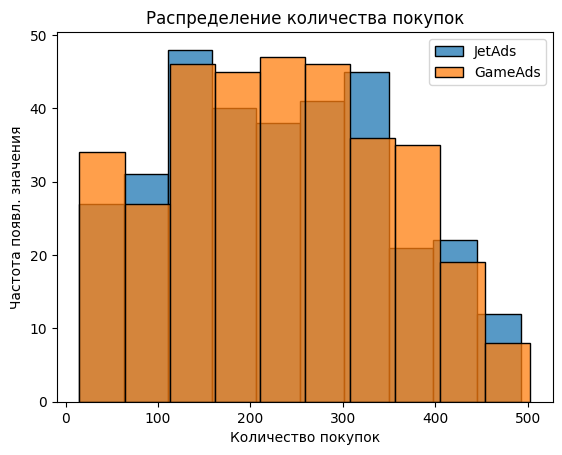

In [52]:
# очистка выбросов
outliers_limit = 0.95
filtered_report = pd.DataFrame()
for adn in report['acq_channel'].unique():
    current = report.query('acq_channel == @adn')['transactions']
    current = current[current < current.quantile(outliers_limit)]
    temp_df = pd.DataFrame({'transactions': current, 'acq_channel': adn})
    filtered_report = pd.concat([filtered_report, temp_df], ignore_index=True)
    sns.histplot(current, label = adn)
    print('Среднее для {}: {:.2f}'.format(adn, current.mean()))
    plt.legend(), plt.title('Распределение количества покупок'), plt.xlabel('Количество покупок'), plt.ylabel('Частота появл. значения')

(Text(0.5, 0, 'Количество покупок'),
 Text(0, 0.5, 'Канал привлечения'),
 Text(0.5, 1.0, 'Сравнение распределений количества покупок в группах'))

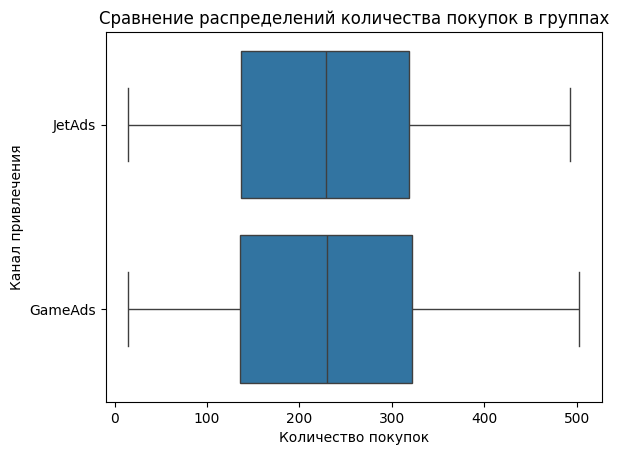

In [54]:
sns.boxplot(data = filtered_report, x = 'transactions', y = 'acq_channel')
plt.xlabel('Количество покупок'), plt.ylabel('Канал привлечения'), plt.title('Сравнение распределений количества покупок в группах')

По итогам, даже с учетом удаления выбросов, получилось равное распределение.

In [56]:
report_ga = filtered_report.query('acq_channel == "GameAds"')['transactions']
report_ja = filtered_report.query('acq_channel == "JetAds"')['transactions']

alpha = 0.05

p_value = stats.ttest_ind(report_ga, report_ja, equal_var = False).pvalue
print('p-value: {:.5f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: средние в двух группах не равны.')
else:
    print('Не отвергаем нулевую гипотезу: средние в двух группах равны.')

p-value: 0.81616
Не отвергаем нулевую гипотезу: средние в двух группах равны.
